Beijing PM2.5 Dataset 

Problem to solve: predict the PM2.5 concentration in Beijing based on other features including Dew Point, Temperature, Pressure, Combined wind direction and so on. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Exploratory Data Analysis**

In [2]:
#Read the dataset
pm25_df=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
pm25_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
#Generate descriptive statistics
pm25_df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


**Graph1**:First plot the correlation heatmap of all the features to get a sense of relative correlation between different feature pairs

Text(0.5, 1.0, 'Correlation heatmap')

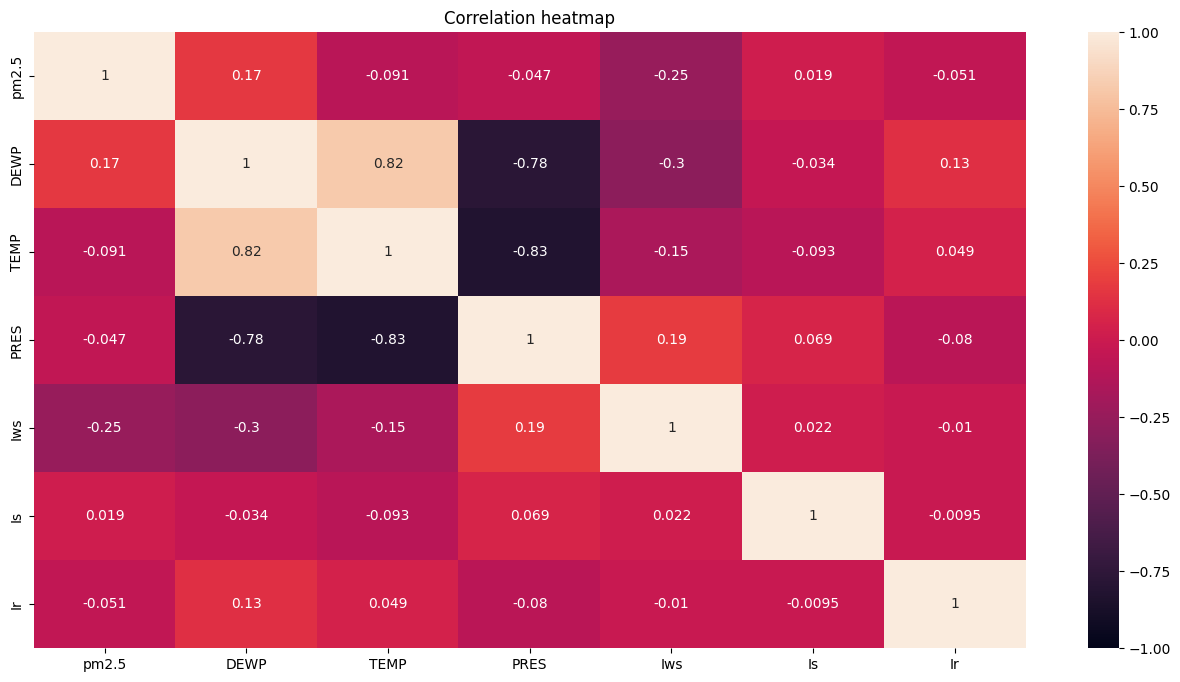

In [6]:
plt.figure(figsize=(16, 8))
hm = sns.heatmap(pm25_df[["pm2.5","DEWP","TEMP","PRES","Iws","Is","Ir"]].corr(), vmin=-1, vmax=1, annot=True)
hm.set_title('Correlation heatmap')

**Graph2**:Plot the bar chart of PM2.5 concentration values to see what is the distribution

Text(0.5, 1.0, 'PM2.5 concentration')

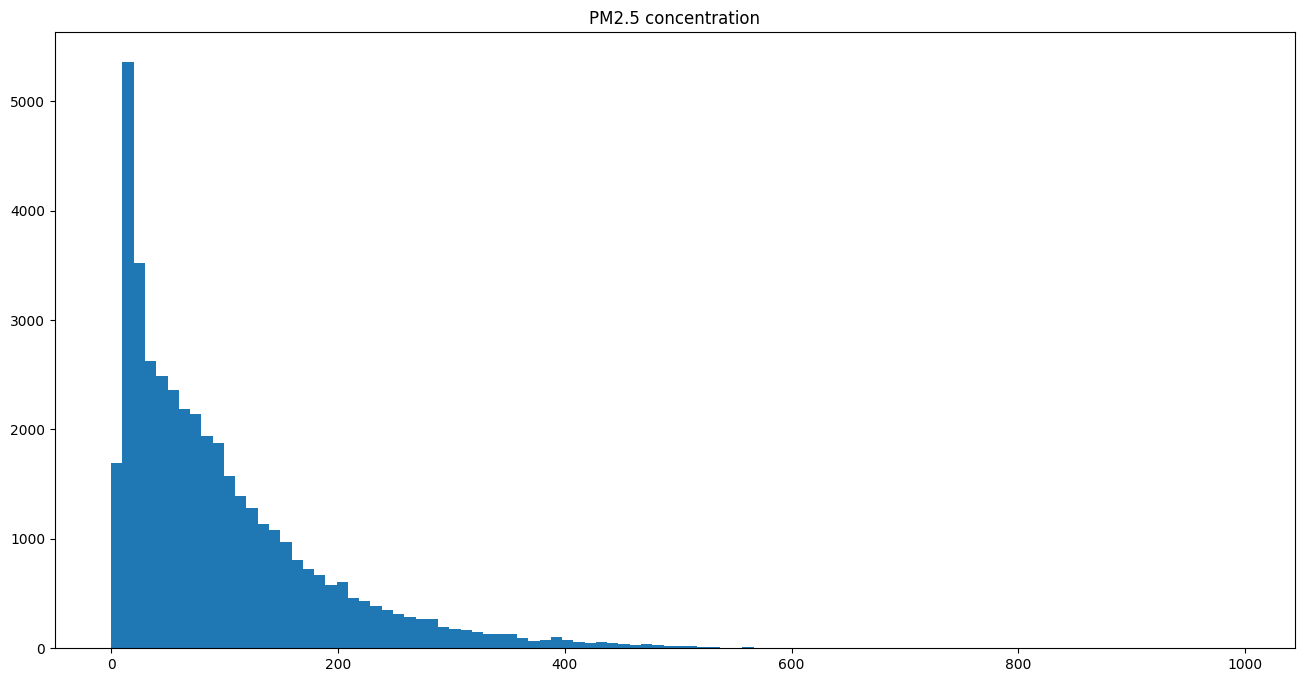

In [8]:
plt.figure(figsize=(16, 8))
plt.hist(pm25_df["pm2.5"],bins=100)
plt.title("PM2.5 concentration")


**Graph3**:Since the correlation heatmap did not cover the relationship between PM2.5 concentration and the categorical feature combined wind direction, I would like to visualize the correlation between PM2.5 concentration and combined wind direction by plotting the box plot of PM2.5 concentrations group by differnt combined wind direction.

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1600x800 with 0 Axes>

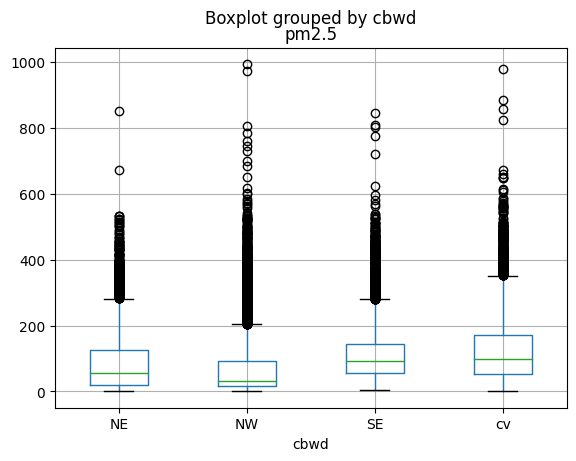

In [9]:
plt.figure(figsize=(16, 8))
pm25_df.boxplot(column=['pm2.5'], by='cbwd')

**Graph4**:Pie chart of air quality based on PM2.5 concentration

In [12]:
#Pie chart of air quality based on PM2.5 concentration
#Add a new column "Air quality classification" to the dataset grouped by PM2.5 concentration and based on the China local claasification standard
def get_air(df):
    if df["pm2.5"]<=35:
        return "Great"
    if 35<df["pm2.5"]<=75:
        return "Good"
    if 75<df["pm2.5"]<=115:
        return "Light pollution"
    if 115<df["pm2.5"]<=150:
        return "Medium pollution"
    if 150<df["pm2.5"]<=250:
        return "Heavy pollution"
    if df["pm2.5"]>250:
        return "Very heavy pollution"

pm25_df["Air quality classification"]=pm25_df.apply (lambda row: get_air(row), axis=1)
pm25_df.head(30)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Air quality classification
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,None
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,None
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,None
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,None
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,None
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0,None
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0,None
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0,None
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0,None
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0,None


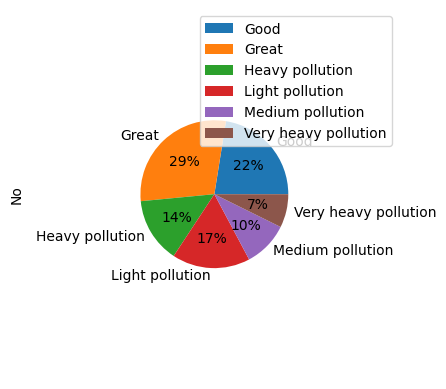

In [30]:
pm25_df.groupby(["Air quality classification"]).count().plot(kind='pie', y='No', autopct='%1.0f%%',radius=0.5)

**Graph5**:Plot the bar chart of air quality level distribution of different quater of the year

In [31]:
#Add a column of "Quater" based on the month of the data
def get_quater(df):
    if df["month"]<=3:
        return 1
    if 3<df["month"]<=6:
        return 2   
    if 6<df["month"]<=9:
        return 3  
    else:
        return 4
pm25_df["Quater"]=pm25_df.apply (lambda row: get_quater(row), axis=1)
pm25_df.head(30)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Air quality classification,Quater
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,None,1
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,None,1
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,None,1
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,None,1
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,None,1
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0,None,1
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0,None,1
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0,None,1
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0,None,1
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0,None,1


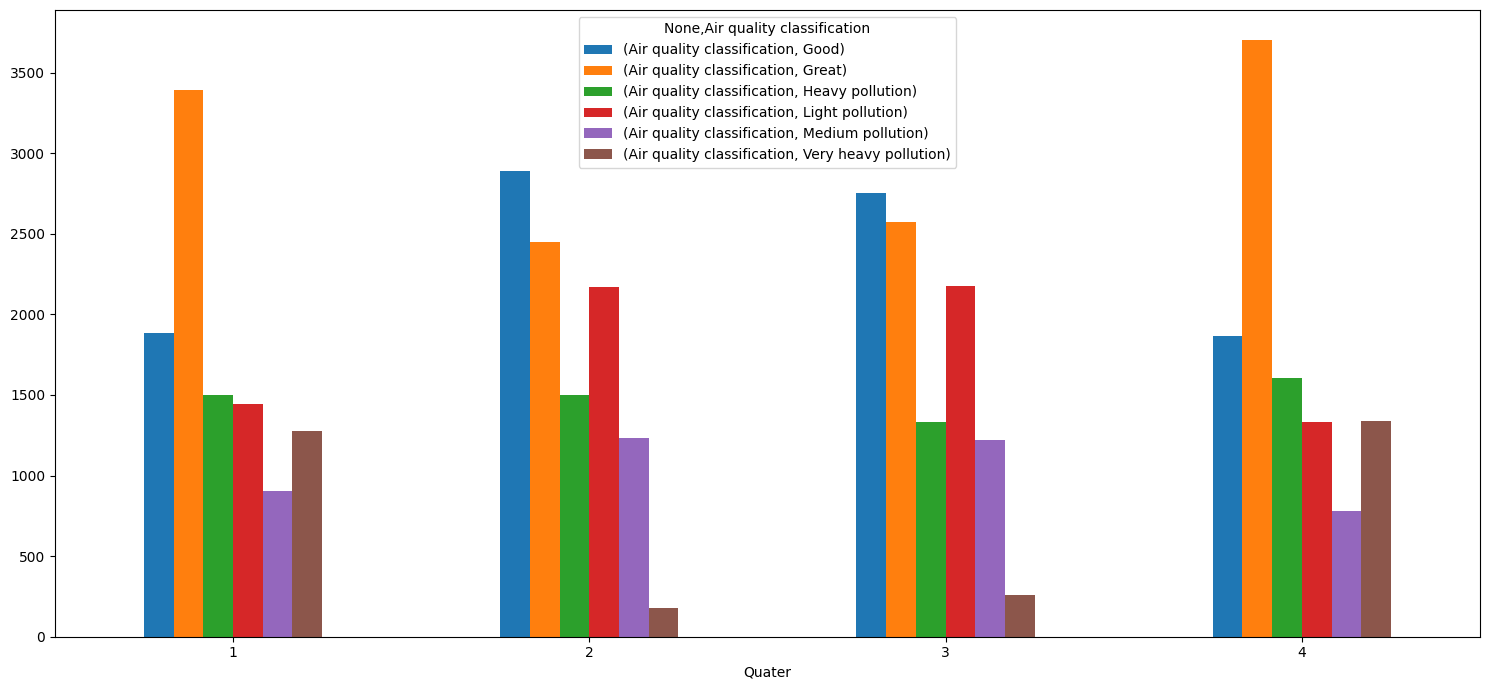

In [50]:
#Plot the bar chart of air quality level distribution of different quater of the year
trial = pd.DataFrame(pm25_df.groupby('Quater')['Air quality classification'].value_counts())

ax = trial.unstack(level=1).plot(kind='bar', subplots=False, rot=0, figsize=(15, 7), layout=(2, 3))
plt.tight_layout()

**Data Preprocessing**

In [52]:
#Check missing values:
pm25_df.isnull().sum()

No                               0
year                             0
month                            0
day                              0
hour                             0
pm2.5                         2067
DEWP                             0
TEMP                             0
PRES                             0
cbwd                             0
Iws                              0
Is                               0
Ir                               0
Air quality classification    2067
Quater                           0
dtype: int64

In [54]:
#Step 1:Drop the data with missing values
pm25_df.dropna(inplace=True)
pm25_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Air quality classification,Quater
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,Medium pollution,1
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,Medium pollution,1
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,Heavy pollution,1
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,Heavy pollution,1
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,Medium pollution,1


In [55]:
#Check missing values again
pm25_df.isnull().sum()

No                            0
year                          0
month                         0
day                           0
hour                          0
pm2.5                         0
DEWP                          0
TEMP                          0
PRES                          0
cbwd                          0
Iws                           0
Is                            0
Ir                            0
Air quality classification    0
Quater                        0
dtype: int64

In [60]:
#Step2: Drop columns that are not helpful in the prediction of PM2.5 concentration
pm25_df=pm25_df.drop(["No","year","month","day","hour","cbwd","Air quality classification","Quater"],axis=1)
pm25_df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0


In [61]:
#Step 3:Split the dataset into traning and test set
from sklearn.model_selection import train_test_split
X=pm25_df.drop(['pm2.5'],axis=1)
y=pm25_df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test.shape

(12528, 6)

In [62]:
#Step4:Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

**Implement 2 machine learning models **

**Support Vector Regression (SVR):**

In [66]:
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled,y_train)
y_train_pred= regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("SVR training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("SVR test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

SVR training RMSE:  79.77955900579765
SVR test RMSE:  78.46578586074092


**Neural Network (NN):**

In [67]:
from sklearn.neural_network import MLPRegressor
nnmodel=MLPRegressor(random_state=1)
nnmodel.fit(X_train_scaled,y_train)
y_train_pred= nnmodel.predict(X_train_scaled)
y_test_pred = nnmodel.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("Neural Network training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Neural Network test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Neural Network training RMSE:  74.54402173949859
Neural Network test RMSE:  73.67263141581712


**Hyperparameter tuning**

**Support Vector Regression (SVR):**

In [ ]:
from sklearn.model_selection import GridSearchCV
regressor = SVR()
parameter_range = {
    'kernel': ['poly','rbf'],
    'degree': [1,2,3,4,5],
    'max_iter': [100, 200, 500],
    'C': [0.05, 0.1, 1, 10]
}
best_model = GridSearchCV(regressor, parameter_range, n_jobs=-1, cv=3)
best_model.fit(X_train_scaled,y_train)
print('Best parameters found:\n', best_model.best_params_)
y_train_pred= best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("Best SVR training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Best SVR test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

In [82]:
regressor = SVR(kernel='rbf',degree=3,max_iter=-1,C=1)
regressor.fit(X_train_scaled,y_train)
y_train_pred= regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("SVR training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("SVR test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

SVR training RMSE:  79.77955900579765
SVR test RMSE:  78.46578586074092


**Neural Network (NN):**

In [ ]:
NN = MLPRegressor()
parameter_range = {
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.1],
    'learning_rate_init': [0.001,0.05,0.01],
    'max_iter': [100, 300, 500,1000],
    'tol': [1e-5, 1e-4, 1e-3]
}
best_model = GridSearchCV(NN, parameter_range, n_jobs=-1, cv=3)
best_model.fit(X_train_scaled,y_train)
print('Best parameters found:\n', best_model.best_params_)

y_train_pred= best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("Neural Network training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Neural Network test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
best_model.best_params_

In [87]:
nnmodel=MLPRegressor(alpha=0.001,learning_rate_init=0.001,max_iter=1000,tol=1e-3)
nnmodel.fit(X_train_scaled,y_train)
y_train_pred= nnmodel.predict(X_train_scaled)
y_test_pred = nnmodel.predict(X_test_scaled)

#Get the RMSE of the model of training and test set as the performance metrics
print("Neural Network training RMSE: ",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Neural Network test RMSE: ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Neural Network training RMSE:  73.49686904516508
Neural Network test RMSE:  72.85703127629297
